# Same analysis as before but for a bigger geographical place : the *Petite Couronne*

In [3]:
%%capture
#!pip install palettable
#!pip install contextily
#!pip install osmnx
#!pip install pysal
#!pip install statannot

In [4]:
import os
os.environ['USE_PYGEOS'] = '0'
import helpers as hs
from importlib import reload
import folium

--- Import helpers ---


# Creation of the database for the *Petite Couronne*

## Creation of aggregated data on the INSPIRE 200X200m grid
We start from the OSM data with a list of points with coordinates and information and we want to obtain a list of INSPIRE squares with the total of categories per square (this has been done in the file extract_data.ipynb)

In [5]:
import pandas as pd
from shapely import wkt
import geopandas as gpd

pc_gdf = pd.read_csv('https://minio.lab.sspcloud.fr/mthaury/public/pc_gdf.csv')
pc_gdf['geometry'] = pc_gdf['geometry'].apply(wkt.loads)
pc_gdf = gpd.GeoDataFrame(pc_gdf, geometry='geometry')
pc_gdf.set_index('IdINSPIRE', inplace=True)
pc_gdf.sample(5)

Id_carr1km  I_est_cr  \
IdINSPIRE                                                                   
CRS3035RES200mN2895400E3749000  CRS3035RES1000mN2895000E3749000         1   
CRS3035RES200mN2887600E3756800  CRS3035RES1000mN2887000E3756000         0   
CRS3035RES200mN2885600E3757400  CRS3035RES1000mN2885000E3757000         0   
CRS3035RES200mN2880600E3759200  CRS3035RES1000mN2880000E3759000         0   
CRS3035RES200mN2880000E3762600  CRS3035RES1000mN2880000E3762000         1   

                                                      Id_carr_n  Groupe  \
IdINSPIRE                                                                 
CRS3035RES200mN2895400E3749000  CRS3035RES1000mN2895000E3749000  869215   
CRS3035RES200mN2887600E3756800  CRS3035RES1000mN2887000E3756000  855105   
CRS3035RES200mN2885600E3757400  CRS3035RES1000mN2885000E3757000  851733   
CRS3035RES200mN2880600E3759200  CRS3035RES1000mN2880000E3759000  845748   
CRS3035RES200mN2880000E3762600  CRS3035RES1000mN2880000E3762000  845874   

                                Depcom  I_pauv  \
IdINSPIRE                                        
CRS3035RES200mN2895400E3749000   92050       0   
CRS3035RES200mN2887600E3756800   75115       0   
CRS3035RES200mN2885600E3757400   92049       0   
CRS3035RES200mN2880600E3759200   94038       0   
CRS3035RES200mN2880000E3762600   94081       0   

                                                    Id_car2010     Ind    Men  \
IdINSPIRE                                                                       
CRS3035RES200mN2895400E3749000  CRS3035RES200mN2895400E3749000    10.0    5.0   
CRS3035RES200mN2887600E3756800  CRS3035RES200mN2887600E3756800  1584.5  830.0   
CRS3035RES200mN2885600E3757400  CRS3035RES200mN2885600E3757400   929.0  433.0   
CRS3035RES200mN2880600E3759200  CRS3035RES200mN2880600E3759200   646.0  244.0   
CRS3035RES200mN2880000E3762600  CRS3035RES200mN2880000E3762600    15.0    7.8   

                                Men_pauv  ...  Ind_80p  Ind_inc  I_est_1km  \
IdINSPIRE                                 ...                                
CRS3035RES200mN2895400E3749000       0.7  ...      0.6      0.0          0   
CRS3035RES200mN2887600E3756800      62.0  ...    109.0     50.0          0   
CRS3035RES200mN2885600E3757400      34.0  ...     15.0     17.0          0   
CRS3035RES200mN2880600E3759200      33.0  ...     31.0     17.0          0   
CRS3035RES200mN2880000E3762600       1.4  ...      2.4      0.0          0   

                                                                         geometry  \
IdINSPIRE                                                                           
CRS3035RES200mN2895400E3749000  MULTIPOLYGON (((2.18420 48.89837, 2.18392 48.9...   
CRS3035RES200mN2887600E3756800  MULTIPOLYGON (((2.30096 48.83604, 2.30068 48.8...   
CRS3035RES200mN2885600E3757400  MULTIPOLYGON (((2.31187 48.81872, 2.31159 48.8...   
CRS3035RES200mN2880600E3759200  MULTIPOLYGON (((2.34318 48.77571, 2.34291 48.7...   
CRS3035RES200mN2880000E3762600  MULTIPOLYGON (((2.39005 48.77351, 2.38978 48.7...   

                                restaurant  culture and art  education  \
IdINSPIRE                                                                
CRS3035RES200mN2895400E3749000         1.0              0.0        0.0   
CRS3035RES200mN2887600E3756800         2.0              0.0        0.0   
CRS3035RES200mN2885600E3757400         2.0              1.0        3.0   
CRS3035RES200mN2880600E3759200         0.0              0.0        0.0   
CRS3035RES200mN2880000E3762600         0.0              0.0        0.0   

                                food_shops  fashion_beauty  supply_shops  
IdINSPIRE                                                                 
CRS3035RES200mN2895400E3749000         0.0             0.0           0.0  
CRS3035RES200mN2887600E3756800         0.0             0.0           1.0  
CRS3035RES200mN2885600E3757400         1.0             0.0           0.0  
CRS3035RES200mN2880600E3759200 

In [6]:
#hs.folium_grid_cat_plot(pc_gdf,"restaurant")

### Adding a variable for the housing

In [7]:
pc_gdf['Log'] = pc_gdf['Log_inc'] + pc_gdf['Log_av45'] + pc_gdf['Log_45_70'] + pc_gdf['Log_70_90'] + pc_gdf['Log_ap90'] # nombre total de logement

## Computation of accessibility indexes

### Two-step floating catchment area method (2SFCA)

#### Weight calcul

In [8]:
# very long (1h30)

#idCol = "IdINSPIRE"
#weights_by_id_pc = hs.calculate_distanceband_weights(pc_gdf,idCol=idCol) 

# note it sets the idCol as index for the rest of the program to work weights_by_id and gdf needs to have the same index

File saving (around 15 min)

In [9]:
#compression_opts = dict(method='zip', archive_name='out.csv')  
#weights_by_id_pc.to_csv('weights_by_id_pc.zip', index=True,compression=compression_opts) 

Here are the data : 

In [10]:
weights_by_id_pc = pd.read_csv('https://minio.lab.sspcloud.fr/mthaury/public/weights_by_id_pc.zip')
weights_by_id_pc = weights_by_id_pc.set_index(pd.Index(weights_by_id_pc.columns.tolist()))
weights_by_id_pc.sample(5)

CRS3035RES200mN2893400E3763200  \
CRS3035RES200mN2885600E3773000                             0.0   
CRS3035RES200mN2879600E3764600                             0.0   
CRS3035RES200mN2886800E3753800                             0.0   
CRS3035RES200mN2888000E3751800                             0.0   
CRS3035RES200mN2873600E3772600                             0.0   

                                CRS3035RES200mN2890000E3762200  \
CRS3035RES200mN2885600E3773000                             0.0   
CRS3035RES200mN2879600E3764600                             0.0   
CRS3035RES200mN2886800E3753800                             0.0   
CRS3035RES200mN2888000E3751800                             0.0   
CRS3035RES200mN2873600E3772600                             0.0   

                                CRS3035RES200mN2893400E3762400  \
CRS3035RES200mN2885600E3773000                             0.0   
CRS3035RES200mN2879600E3764600                             0.0   
CRS3035RES200mN2886800E3753800                             0.0   
CRS3035RES200mN2888000E3751800                             0.0   
CRS3035RES200mN2873600E3772600                             0.0   

                                CRS3035RES200mN2891800E3763600  \
CRS3035RES200mN2885600E3773000                             0.0   
CRS3035RES200mN2879600E3764600                             0.0   
CRS3035RES200mN2886800E3753800                             0.0   
CRS3035RES200mN2888000E3751800                             0.0   
CRS3035RES200mN2873600E3772600                             0.0   

                                CRS3035RES200mN2890800E3763200  \
CRS3035RES200mN2885600E3773000                             0.0   
CRS3035RES200mN2879600E3764600                             0.0   
CRS3035RES200mN2886800E3753800                             0.0   
CRS3035RES200mN2888000E3751800                             0.0   
CRS3035RES200mN2873600E3772600                             0.0   

                                CRS3035RES200mN2885800E3760600  \
CRS3035RES200mN2885600E3773000                             0.0   
CRS3035RES200mN2879600E3764600                             0.0   
CRS3035RES200mN2886800E3753800                             0.0   
CRS3035RES200mN2888000E3751800                             0.0   
CRS3035RES200mN2873600E3772600                             0.0   

                                CRS3035RES200mN2888400E3761400  \
CRS3035RES200mN2885600E3773000                             0.0   
CRS3035RES200mN2879600E3764600                             0.0   
CRS3035RES200mN2886800E3753800                             0.0   
CRS3035RES200mN2888000E3751800                             0.0   
CRS3035RES200mN2873600E3772600                             0.0   

                                CRS3035RES200mN2891800E3763800  \
CRS3035RES200mN2885600E3773000                             0.0   
CRS3035RES200mN2879600E3764600                             0.0   
CRS3035RES200mN2886800E3753800                             0.0   
CRS3035RES200mN2888000E3751800                             0.0   
CRS3035RES200mN2873600E3772600                             0.0   

                                CRS3035RES200mN2890000E3762400  \
CRS3035RES200mN2885600E3773000                             0.0   
CRS3035RES200mN2879600E3764600                             0.0   
CRS3035RES200mN2886800E3753800                             0.0   
CRS3035RES200mN2888000E3751800                             0.0   
CRS3035RES200mN2873600E3772600                             0.0   

                                CRS3035RES200mN2893400E3762800  ...  \
CRS3035RES200mN2885600E3773000                             0.0  ...   
CRS3035RES200mN2879600E3764600                             0.0  ...   
CRS3035RES200mN2886800E3753800                             0.0  ...   
CRS3035RES200mN2888000E3751800                             0.0  ...   
CRS3035RES200mN2873600E3772600                             0.0  ...   

                                

##### Let's check the consistency

In [ ]:
m=folium.Map((48.8634100,2.3588000), zoom_start=13.5)
m = pc_gdf[["geometry"]].assign(weight_0 = weights_by_id_pc[pc_gdf.index[1]].values).explore(
    m = m,
    column = 'weight_0',
    tooltip = 'weight_0',
    tiles= "OpenStreetMap",
    popup = True,
    cmap = 'Set1',
    #categorical= True,
    style_kwds = dict(color = "black",fillOpacity=0.4),
)
m

#### Calculate accessibility

In [12]:
interestVar = ['Log','Log_soc','restaurant',
       'culture and art', 'education', 'food_shops', 'fashion_beauty',
       'supply_shops']
accessibility_measures = hs.calculate_2SFCA_accessibility(pc_gdf,interestVar,weights_by_id_pc)

In [13]:
for var in interestVar:
    pc_gdf[var+"_access"] = accessibility_measures[var]

In [14]:
#hs.folium_grid_cat_plot(pc_gdf,"restaurant_access")

### Aggregated accesibility (calcul grossier): 

On somme tout les calculs d'accessibilité mais le problème est que nous ne disposons pas de poids pour chaque aménité qui est calculé par la fréquence des personnes allant dans chaque lieu. Une idée simple serait de faire le rapport pour chaque aménité entre le nombre d'aménités p sur le nombre total d'aménités et donner un poids opposé à sa fréquence dans le calcul final : 
 $$ w_{p} = \frac{N_{p}}{N} $$
 
 L'idée est que moins il y a d'aménités, plus l'aménité en question est importante : il y a qu'une école alors qu'il y a 20 restaurants. Mais cela laisse de nombreux biais en surfavorisant les lieux de culture et les lieux d'éducation. 
 
 On obtiendrait ainsi pour la cellule i, le 2SFCA aggrégé : 
 $ CS_{i} = \sum_{p=1}^{P} (1 -w_{p}) \times X_{i,p} $ avec $ X_{i,p} = \frac{A_{i,p} - \min {A_{i,p}}}{\max{A_{p}} - \min{A_{p}}} $, la normalisation min-max de l'accessibilité de la cellule i à l'aménité p $A_{i,p}$. 
 
 On présentera ici un estimateur sans les poids et un autre avec. 


 
 

In [15]:
pc_gdf = hs.aggregate_2SFCA(pc_gdf)

**With weights**

In [ ]:
hs.folium_grid_cat_plot(pc_gdf,"CS_aggregated", op = 0.1)

# Analyses

## Régression

"L’autocorrélation spatiale a deux sources principales :
- elle peut provenir du fait que les données sont affectées par des processus qui relient des lieux différents et qui sont à l’origine d’une organisation spatiale particulière des activités. En effet, les processus d’interactions sont source d’autocorrélation spatiale lorsque les événements ou les circonstances en un lieu donné affectent les conditions en d’autres lieux si ces derniers interagissent d’une manière ou d’une autre, par des mouvements de biens, de personnes, de capitaux, des externalités spatiales ou toutes les formes de comportements où un acteur économique réagit aux actions d’autres acteurs. Par exemple, la diffusion d’un phénomène (comme la diffusion technologique) à partir d’un ou de plusieurs lieux d’origine implique que l’intensité de la mesure de ce phénomène dépend de la distance à l’origine. Aux localisations proches les unes des autres, donc à des distances comparables de l’origine, seront donc associées des intensités similaires pour le phénomène étudié ;
- elle peut également provenir d’une mauvaise spécification du modèle, comme des variables omises spatialement autocorrélées, d’une forme fonctionnelle incorrecte ou d’erreurs de mesure (c’est en particulier le cas lorsque l’étendue spatiale du phénomène étudié ne coïncide pas avec les unités spatiales d’observation). Elle est alors considérée comme un outil de diagnostic et de détection d’une mauvaise spécification du modèle." 

(source : https://www.cairn.info/revue-economie-et-prevision-2002-4-page-139.htm)

### Spatial Weight 
Choix d'un poids continu au format Queen suivant l'indice de Moran (à vérifier). 


In [17]:
from pysal.lib import weights
w_queen = weights.contiguity.Queen.from_dataframe(pc_gdf) # adjacent in all directions, including diagonal.
# Replace Queen by rook for only up/down/left/right adjancy
w_queen.transform = 'r'

('WARNING: ', 196, ' is an island (no neighbors)')
('WARNING: ', 231, ' is an island (no neighbors)')
('WARNING: ', 744, ' is an island (no neighbors)')
('WARNING: ', 780, ' is an island (no neighbors)')
('WARNING: ', 813, ' is an island (no neighbors)')
('WARNING: ', 823, ' is an island (no neighbors)')
('WARNING: ', 836, ' is an island (no neighbors)')
('WARNING: ', 841, ' is an island (no neighbors)')
('WARNING: ', 862, ' is an island (no neighbors)')
('WARNING: ', 1020, ' is an island (no neighbors)')
('WARNING: ', 1060, ' is an island (no neighbors)')
('WARNING: ', 1063, ' is an island (no neighbors)')
('WARNING: ', 1100, ' is an island (no neighbors)')
('WARNING: ', 1259, ' is an island (no neighbors)')
('WARNING: ', 1754, ' is an island (no neighbors)')
('WARNING: ', 1766, ' is an island (no neighbors)')
('WARNING: ', 1769, ' is an island (no neighbors)')
('WARNING: ', 1779, ' is an island (no neighbors)')
('WARNING: ', 1781, ' is an island (no neighbors)')
('WARNING: ', 2437, '

c:\Users\leopo\anaconda3\envs\batomouche\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 70 disconnected components.
 There are 52 islands with ids: 196, 231, 744, 780, 813, 823, 836, 841, 862, 1020, 1060, 1063, 1100, 1259, 1754, 1766, 1769, 1779, 1781, 2437, 2724, 2948, 3123, 3325, 3394, 3933, 4358, 4561, 4736, 5167, 6343, 7109, 7267, 8879, 9888, 10097, 10209, 10234, 10562, 10666, 10973, 11421, 11494, 11747, 11834, 11839, 12794, 12833, 12895, 12926, 13509, 13527.
  warnings.warn(message)


In [18]:
from pysal.explore import esda
moran = esda.moran.Moran(pc_gdf["CS_aggregated"], w_queen)
print("Moran's I", moran.I,"Moran's simulated p-value",moran.p_sim)

#p-value smaller than 0.001 -> we cannot reject that it is randomly distributed, we must use the queen weigth 

c:\Users\leopo\anaconda3\envs\batomouche\lib\site-packages\spaghetti\network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


Moran's I 0.9710053493789141 Moran's simulated p-value 0.001


### Spatial Regression

L'autocorrélation spatiale désigne le fait que les variables ne sont pas réparties de manières idd dans l'espace. Il existe trois modèles principaux.

**Spatial error Model (SEM):** Ce modèle introduit un spatial lag dans le terme d'erreur. 

$$ Y_{i} = \alpha +  X_{i}\beta  + u_{i} $$
$$ u_{i}= \lambda u_{lag - i} + \epsilon_{i}$$

Avec $u_{lag - i} = \sum_{j}w_{i,j}u_{j} $. Le paramètre $\lambda$ représente l'intensité de l'interdépendance entre les termes d'erreurs $u$.

**Spatial lag Model '(SAR):** Ce modèle introduit un spatial lag dans les variables dépendantes. 

$$ Y_{i} = \alpha +  \rho W Y_{lag - i}+ X\beta  + \epsilon_{i} $$

Regarde l'interdépendance spatiale avec les autres variables. On calcule l'endegenous lag en faisant une régression TWO-SLS avec pour instrument de l'endegenous lag, le spatial lag de toutes les variables explicatives. 

**SARMA:** Ce modèle dit SARMA combine les deux précèdentes approches. 

$$ Y = X\beta +  \rho W Y + \lambda u + \epsilon $$


### Préparation des données 

L'idée est de recréer les mêmes variables que l'article d'Utretch dans la mesure du possible : 
- % de foyer vivant en dessous du seuil minimum social (%_soc.minimum)
- % d'individus ayant plus de 65 ans (%_>_65)
- % d'individus ayant moins de 17 ans (%_<_17)
- % de logements construits avant 1945 (%_<_bat_45)
- % de logements construits après 1990 (%_>_bat_90)
- % de résidences collectives  (%_residences)
- La moyenne du revenu annuel par personne (mean_income)
- La densité par $km^2$ (density)

Pour l'analyse de la composition de la petite couronne, on rajoute la variable in_Paris qui indique si l'unité géographique est dans Paris ou  non. 

Nous ne disposons pas du pourcentage de personnes recevant les indémnités chômages ou les allocations RSA, ni du pourcentage de migrants, ni de la distance au transport le plus proche pour le moment. 

In [19]:
pc_gdf["%_soc.minimum"] = (pc_gdf["Men_pauv"]/pc_gdf["Ind"])*100
pc_gdf["%_>_65"] = ((pc_gdf["Ind_65_79"] +pc_gdf["Ind_80p"])/pc_gdf["Ind"])*100
pc_gdf["%_<_17"] = ((pc_gdf["Ind_0_3"] +pc_gdf["Ind_4_5"] + pc_gdf["Ind_6_10"] + pc_gdf["Ind_11_17"])/pc_gdf["Ind"])*100
pc_gdf["%_<_bat_45"] = (pc_gdf["Log_av45"]/(pc_gdf["Log_av45"] +pc_gdf["Log_45_70"] + pc_gdf["Log_70_90"] + pc_gdf["Log_ap90"] + pc_gdf["Log_inc"]))*100
pc_gdf["%_>_bat_90"] = (pc_gdf["Log_ap90"]/(pc_gdf["Log_av45"] +pc_gdf["Log_45_70"] + pc_gdf["Log_70_90"] + pc_gdf["Log_ap90"] + pc_gdf["Log_inc"]))*100
pc_gdf["%_residences"] = (pc_gdf["Men_coll"]/(pc_gdf["Men_coll"] +pc_gdf["Men_mais"]))*100
pc_gdf["mean_income"] = pc_gdf["Ind_snv"]/pc_gdf["Ind"]
pc_gdf["density"] = pc_gdf["Ind"]/(0.0002)
pc_gdf['in_Paris'] = [float(pc_gdf['Depcom'][k]<90000) for k in range(len(pc_gdf))]

In [20]:
from pysal.lib import weights
from pysal.model import spreg
from spreg import OLS

### Spatial regression 
 
 Three models: 
 
 Model A : 
- %_soc.minimum
- %_>_65
- %_<_17

Model B : 
- %_soc.minimum
- %_>_65
- %_<_17
- %_<_bat_45
- %_>_bat_90
- %_residences
- mean_income
- density

Model C : 
- %_soc.minimum
- %_>_65
- %_<_17
- %_<_bat_45
- %_>_bat_90
- %_residences
- mean_income
- density
- in_Paris

In [21]:
independ_var_A = ["%_soc.minimum", "%_>_65", "%_<_17"]
independ_var_B = ["%_soc.minimum", "%_>_65", "%_<_17", "%_<_bat_45", "%_>_bat_90", "%_residences", "mean_income","density"]
independ_var_C = ["%_soc.minimum", "%_>_65", "%_<_17", "%_<_bat_45", "%_>_bat_90", "%_residences", "mean_income","density", 'in_Paris']

#### restaurant_access

In [22]:
dep_var = 'restaurant_access'

Modèle A

In [23]:
hs.LM_test(pc_gdf, dep_var, independ_var_A, w_queen)
print(hs.reg_spatial(pc_gdf,dep_var, independ_var_A, w_queen).summary)

LM error test p_value for restaurant_access : 0.0
LM lag test p_value for restaurant_access : 0.0
Robust LM error test p_value for restaurant_access : 0.0
Robust LM lag test p_value for restaurant_access : 0.0
LM SARMA test p_value for restaurant_access : 0.0
REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES (HET)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :restaurant_access                Number of Observations:       13876
Mean dependent var  :      0.0021                Number of Variables   :           5
S.D. dependent var  :      0.0038                Degrees of Freedom    :       13871
Pseudo R-squared    :      0.9072
Spatial Pseudo R-squared: omitted due to rho outside the boundary (-1, 1).N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------

Modèle C

In [24]:
hs.LM_test(pc_gdf, dep_var, independ_var_C, w_queen)
print(hs.reg_spatial(pc_gdf, dep_var, independ_var_C, w_queen).summary)

LM error test p_value for restaurant_access : 0.0
LM lag test p_value for restaurant_access : 0.0
Robust LM error test p_value for restaurant_access : 0.0
Robust LM lag test p_value for restaurant_access : 0.0
LM SARMA test p_value for restaurant_access : 0.0
REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES (HET)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :restaurant_access                Number of Observations:       13876
Mean dependent var  :      0.0021                Number of Variables   :          11
S.D. dependent var  :      0.0038                Degrees of Freedom    :       13865
Pseudo R-squared    :      0.9076
Spatial Pseudo R-squared: omitted due to rho outside the boundary (-1, 1).N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------

#### culture and art_access

In [25]:
dep_var = 'culture and art_access'

Modèle A

In [26]:
hs.LM_test(pc_gdf, dep_var, independ_var_A, w_queen)
print(hs.reg_spatial(pc_gdf, dep_var, independ_var_A, w_queen).summary)

LM error test p_value for culture and art_access : 0.0
LM lag test p_value for culture and art_access : 0.0
Robust LM error test p_value for culture and art_access : 0.0
Robust LM lag test p_value for culture and art_access : 0.0
LM SARMA test p_value for culture and art_access : 0.0
REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES (HET)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :culture and art_access                Number of Observations:       13876
Mean dependent var  :      0.0004                Number of Variables   :           5
S.D. dependent var  :      0.0007                Degrees of Freedom    :       13871
Pseudo R-squared    :      0.8128
Spatial Pseudo R-squared: omitted due to rho outside the boundary (-1, 1).N. of iterations    :           1                Step1c computed       :          No

------------------------------

Model C

In [27]:
hs.LM_test(pc_gdf, dep_var, independ_var_C, w = w_queen)
print(hs.reg_spatial(pc_gdf, dep_var, independ_var_C, w_queen).summary)

LM error test p_value for culture and art_access : 0.0
LM lag test p_value for culture and art_access : 0.0
Robust LM error test p_value for culture and art_access : 0.0
Robust LM lag test p_value for culture and art_access : 0.0
LM SARMA test p_value for culture and art_access : 0.0
REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES (HET)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :culture and art_access                Number of Observations:       13876
Mean dependent var  :      0.0004                Number of Variables   :          11
S.D. dependent var  :      0.0007                Degrees of Freedom    :       13865
Pseudo R-squared    :      0.7918
Spatial Pseudo R-squared:  0.2813
N. of iterations    :           1                Step1c computed       :          No

----------------------------------------------------------------------

#### education_access

In [28]:
dep_var = 'education_access'

Modèle A

In [29]:
hs.LM_test(pc_gdf, dep_var, independ_var_A, w = w_queen)
print(hs.reg_spatial(pc_gdf, dep_var, independ_var_A, w_queen).summary)

LM error test p_value for education_access : 0.0
LM lag test p_value for education_access : 0.0
Robust LM error test p_value for education_access : 0.0
Robust LM lag test p_value for education_access : 0.0
LM SARMA test p_value for education_access : 0.0
REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES (HET)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :education_access                Number of Observations:       13876
Mean dependent var  :      0.0005                Number of Variables   :           5
S.D. dependent var  :      0.0003                Degrees of Freedom    :       13871
Pseudo R-squared    :      0.9197
Spatial Pseudo R-squared: omitted due to rho outside the boundary (-1, 1).N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------

Modèle C

In [30]:
hs.LM_test(pc_gdf, dep_var, independ_var_C, w = w_queen)
print(hs.reg_spatial(pc_gdf, dep_var, independ_var_C, w_queen).summary)

LM error test p_value for education_access : 0.0
LM lag test p_value for education_access : 0.0
Robust LM error test p_value for education_access : 0.0
Robust LM lag test p_value for education_access : 0.0
LM SARMA test p_value for education_access : 0.0
REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES (HET)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :education_access                Number of Observations:       13876
Mean dependent var  :      0.0005                Number of Variables   :          11
S.D. dependent var  :      0.0003                Degrees of Freedom    :       13865
Pseudo R-squared    :      0.9177
Spatial Pseudo R-squared:  0.1800
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable 

#### food_shops_access

In [31]:
dep_var = 'food_shops_access'

Modèle A

In [32]:
hs.LM_test(pc_gdf, dep_var, independ_var_A, w = w_queen)
print(hs.reg_spatial(pc_gdf, dep_var, independ_var_A, w_queen).summary)

LM error test p_value for food_shops_access : 0.0
LM lag test p_value for food_shops_access : 0.0
Robust LM error test p_value for food_shops_access : 0.0
Robust LM lag test p_value for food_shops_access : 0.0
LM SARMA test p_value for food_shops_access : 0.0
REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES (HET)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :food_shops_access                Number of Observations:       13876
Mean dependent var  :      0.0011                Number of Variables   :           5
S.D. dependent var  :      0.0011                Degrees of Freedom    :       13871
Pseudo R-squared    :      0.9784
Spatial Pseudo R-squared: omitted due to rho outside the boundary (-1, 1).N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------

Modèle C

In [33]:
hs.LM_test(pc_gdf, dep_var, independ_var_C, w = w_queen)
print(hs.reg_spatial(pc_gdf, dep_var, independ_var_C, w_queen).summary)

LM error test p_value for food_shops_access : 0.0
LM lag test p_value for food_shops_access : 0.0
Robust LM error test p_value for food_shops_access : 0.0
Robust LM lag test p_value for food_shops_access : 0.0
LM SARMA test p_value for food_shops_access : 0.0
REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES (HET)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :food_shops_access                Number of Observations:       13876
Mean dependent var  :      0.0011                Number of Variables   :          11
S.D. dependent var  :      0.0011                Degrees of Freedom    :       13865
Pseudo R-squared    :      0.9788
Spatial Pseudo R-squared:  0.4147
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Var

#### fashion_beauty_access

In [34]:
dep_var = 'fashion_beauty_access'

Modèle A

In [35]:
hs.LM_test(pc_gdf, dep_var, independ_var_A, w = w_queen)
print(hs.reg_spatial(pc_gdf, dep_var, independ_var_A, w_queen).summary)

LM error test p_value for fashion_beauty_access : 0.0
LM lag test p_value for fashion_beauty_access : 0.0
Robust LM error test p_value for fashion_beauty_access : 0.0
Robust LM lag test p_value for fashion_beauty_access : 0.0
LM SARMA test p_value for fashion_beauty_access : 0.0
REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES (HET)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :fashion_beauty_access                Number of Observations:       13876
Mean dependent var  :      0.0011                Number of Variables   :           5
S.D. dependent var  :      0.0026                Degrees of Freedom    :       13871
Pseudo R-squared    :      0.9904
Spatial Pseudo R-squared: omitted due to rho outside the boundary (-1, 1).N. of iterations    :           1                Step1c computed       :          No

------------------------------------

# Clustering

In [36]:
bois = ["CRS3035RES200mN2891600E3754800","CRS3035RES200mN2891600E3754400","CRS3035RES200mN2891800E3754000","CRS3035RES200mN2892000E3753800",
        "CRS3035RES200mN2891800E3753200","CRS3035RES200mN2891400E3753200","CRS3035RES200mN2891600E3752000","CRS3035RES200mN2891400E3752400",
        "CRS3035RES200mN2891200E3751800","CRS3035RES200mN2891000E3752200","CRS3035RES200mN2890600E3752000","CRS3035RES200mN2890000E3751400",
        "CRS3035RES200mN2890200E3752600","CRS3035RES200mN2889400E3752600","CRS3035RES200mN2890600E3753600","CRS3035RES200mN2890000E3753200",
        "CRS3035RES200mN2889800E3753600","CRS3035RES200mN2890400E3754000","CRS3035RES200mN2890200E3754000","CRS3035RES200mN2893000E3764400",
        "CRS3035RES200mN2887000E3754400","CRS3035RES200mN2887000E3754600","CRS3035RES200mN2887200E3754800","CRS3035RES200mN2887400E3754800",
        "CRS3035RES200mN2885600E3762800","CRS3035RES200mN2885600E3764600","CRS3035RES200mN2886200E3765200","CRS3035RES200mN2886400E3765400",
        "CRS3035RES200mN2885600E3765400","CRS3035RES200mN2886000E3765800","CRS3035RES200mN2886400E3766200","CRS3035RES200mN2886600E3766400",
        "CRS3035RES200mN2886400E3766800","CRS3035RES200mN2886600E3766800","CRS3035RES200mN2886600E3767000","CRS3035RES200mN2886600E3767200",
        "CRS3035RES200mN2886400E3767600","CRS3035RES200mN2886400E3768000","CRS3035RES200mN2886600E3768200","CRS3035RES200mN2886000E3767000",
        "CRS3035RES200mN2886000E3767600","CRS3035RES200mN2885600E3768000","CRS3035RES200mN2885000E3767000","CRS3035RES200mN2885000E3767400",
        "CRS3035RES200mN2885000E3768200","CRS3035RES200mN2884600E3768200","CRS3035RES200mN2884400E3768000"]

In [37]:
clusterVar = [var+"_access" for var in interestVar]#+interestVar
X = pc_gdf[clusterVar]
X = X.drop(bois)
pc_gdf_exclu_bois = pc_gdf.drop(bois)

### KMeans
MiniBatchKMeans works better because we don't have that many samples

#### Choice of nb of clusters

In [38]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

mat = X.values

pipe = Pipeline(steps=[('preprocessor', StandardScaler),
                      ('clustering', MiniBatchKMeans)])
scaler = pipe['preprocessor']()
scaler.fit(X=mat)
mat = scaler.transform(mat)

km = pipe['clustering'](n_clusters = 4, random_state =1)

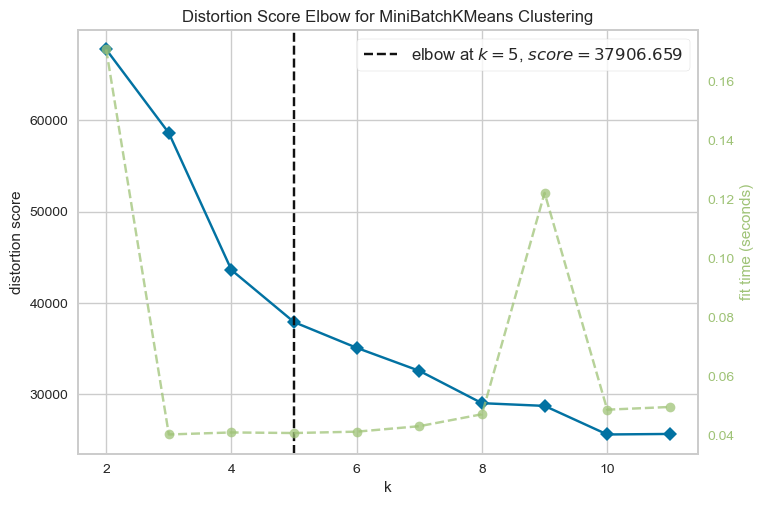

<AxesSubplot: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
visualizer = KElbowVisualizer(km, k=(2,12))
visualizer.fit(mat)
visualizer.show()


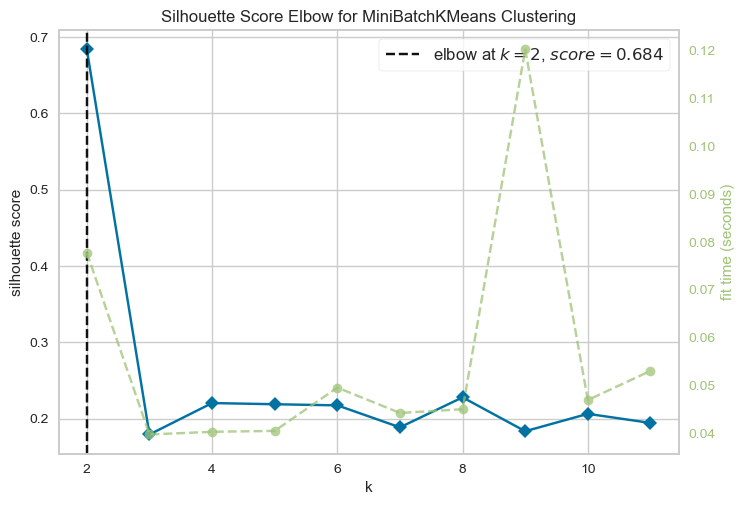

<AxesSubplot: title={'center': 'Silhouette Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [40]:
visualizer = KElbowVisualizer(km, k=(2,12), metric="silhouette")
visualizer.fit(mat)
visualizer.show()

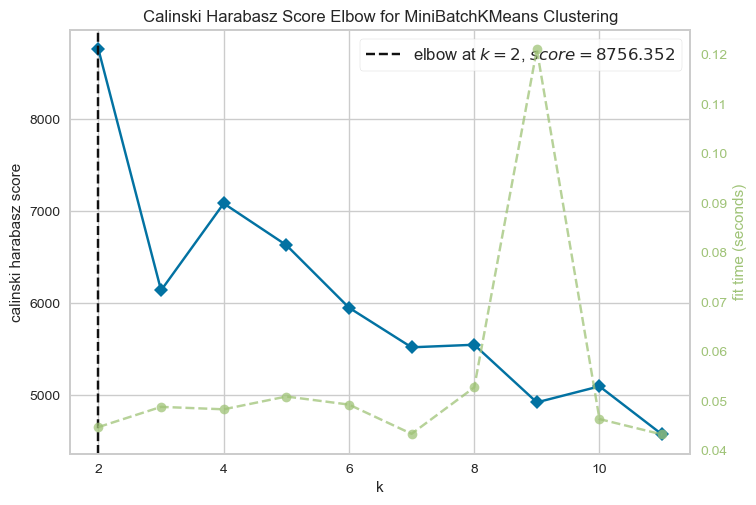

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [41]:
visualizer = KElbowVisualizer(km, k=(2,12), metric="calinski_harabasz")
visualizer.fit(mat)
visualizer.show()

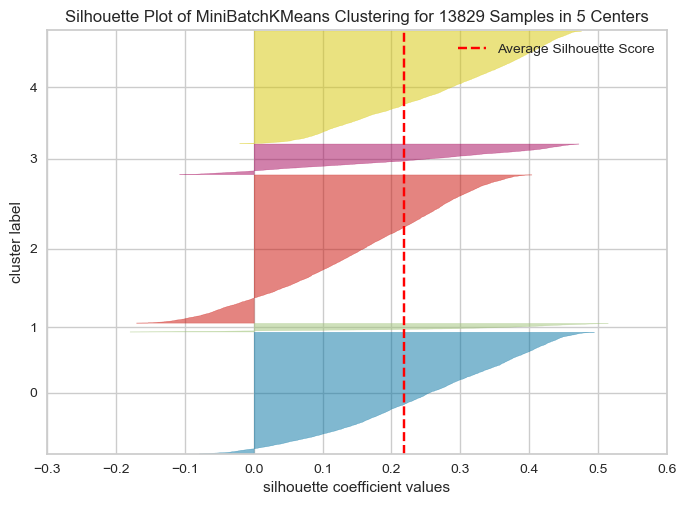

SilhouetteVisualizer(ax=<AxesSubplot: title={'center': 'Silhouette Plot of MiniBatchKMeans Clustering for 13829 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=MiniBatchKMeans(n_clusters=5, random_state=1))

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer, silhouette_visualizer
# Instantiate the clustering model and visualizer
km = pipe['clustering'](n_clusters = 5, random_state =1)
silhouette_visualizer(km, mat, colors='yellowbrick')       # Finalize and render the figure

In [52]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

mat = X.values

pipe = Pipeline(steps=[('preprocessor', StandardScaler),
                      ('clustering', MiniBatchKMeans)])
scaler = pipe['preprocessor']()
scaler.fit(X=mat)
mat = scaler.transform(mat)
nb_cluster = 5
km = pipe['clustering'](n_clusters = nb_cluster, random_state =1)
km.fit(mat)
labels = km.labels_
pc_gdf_exclu_bois["label"] = labels

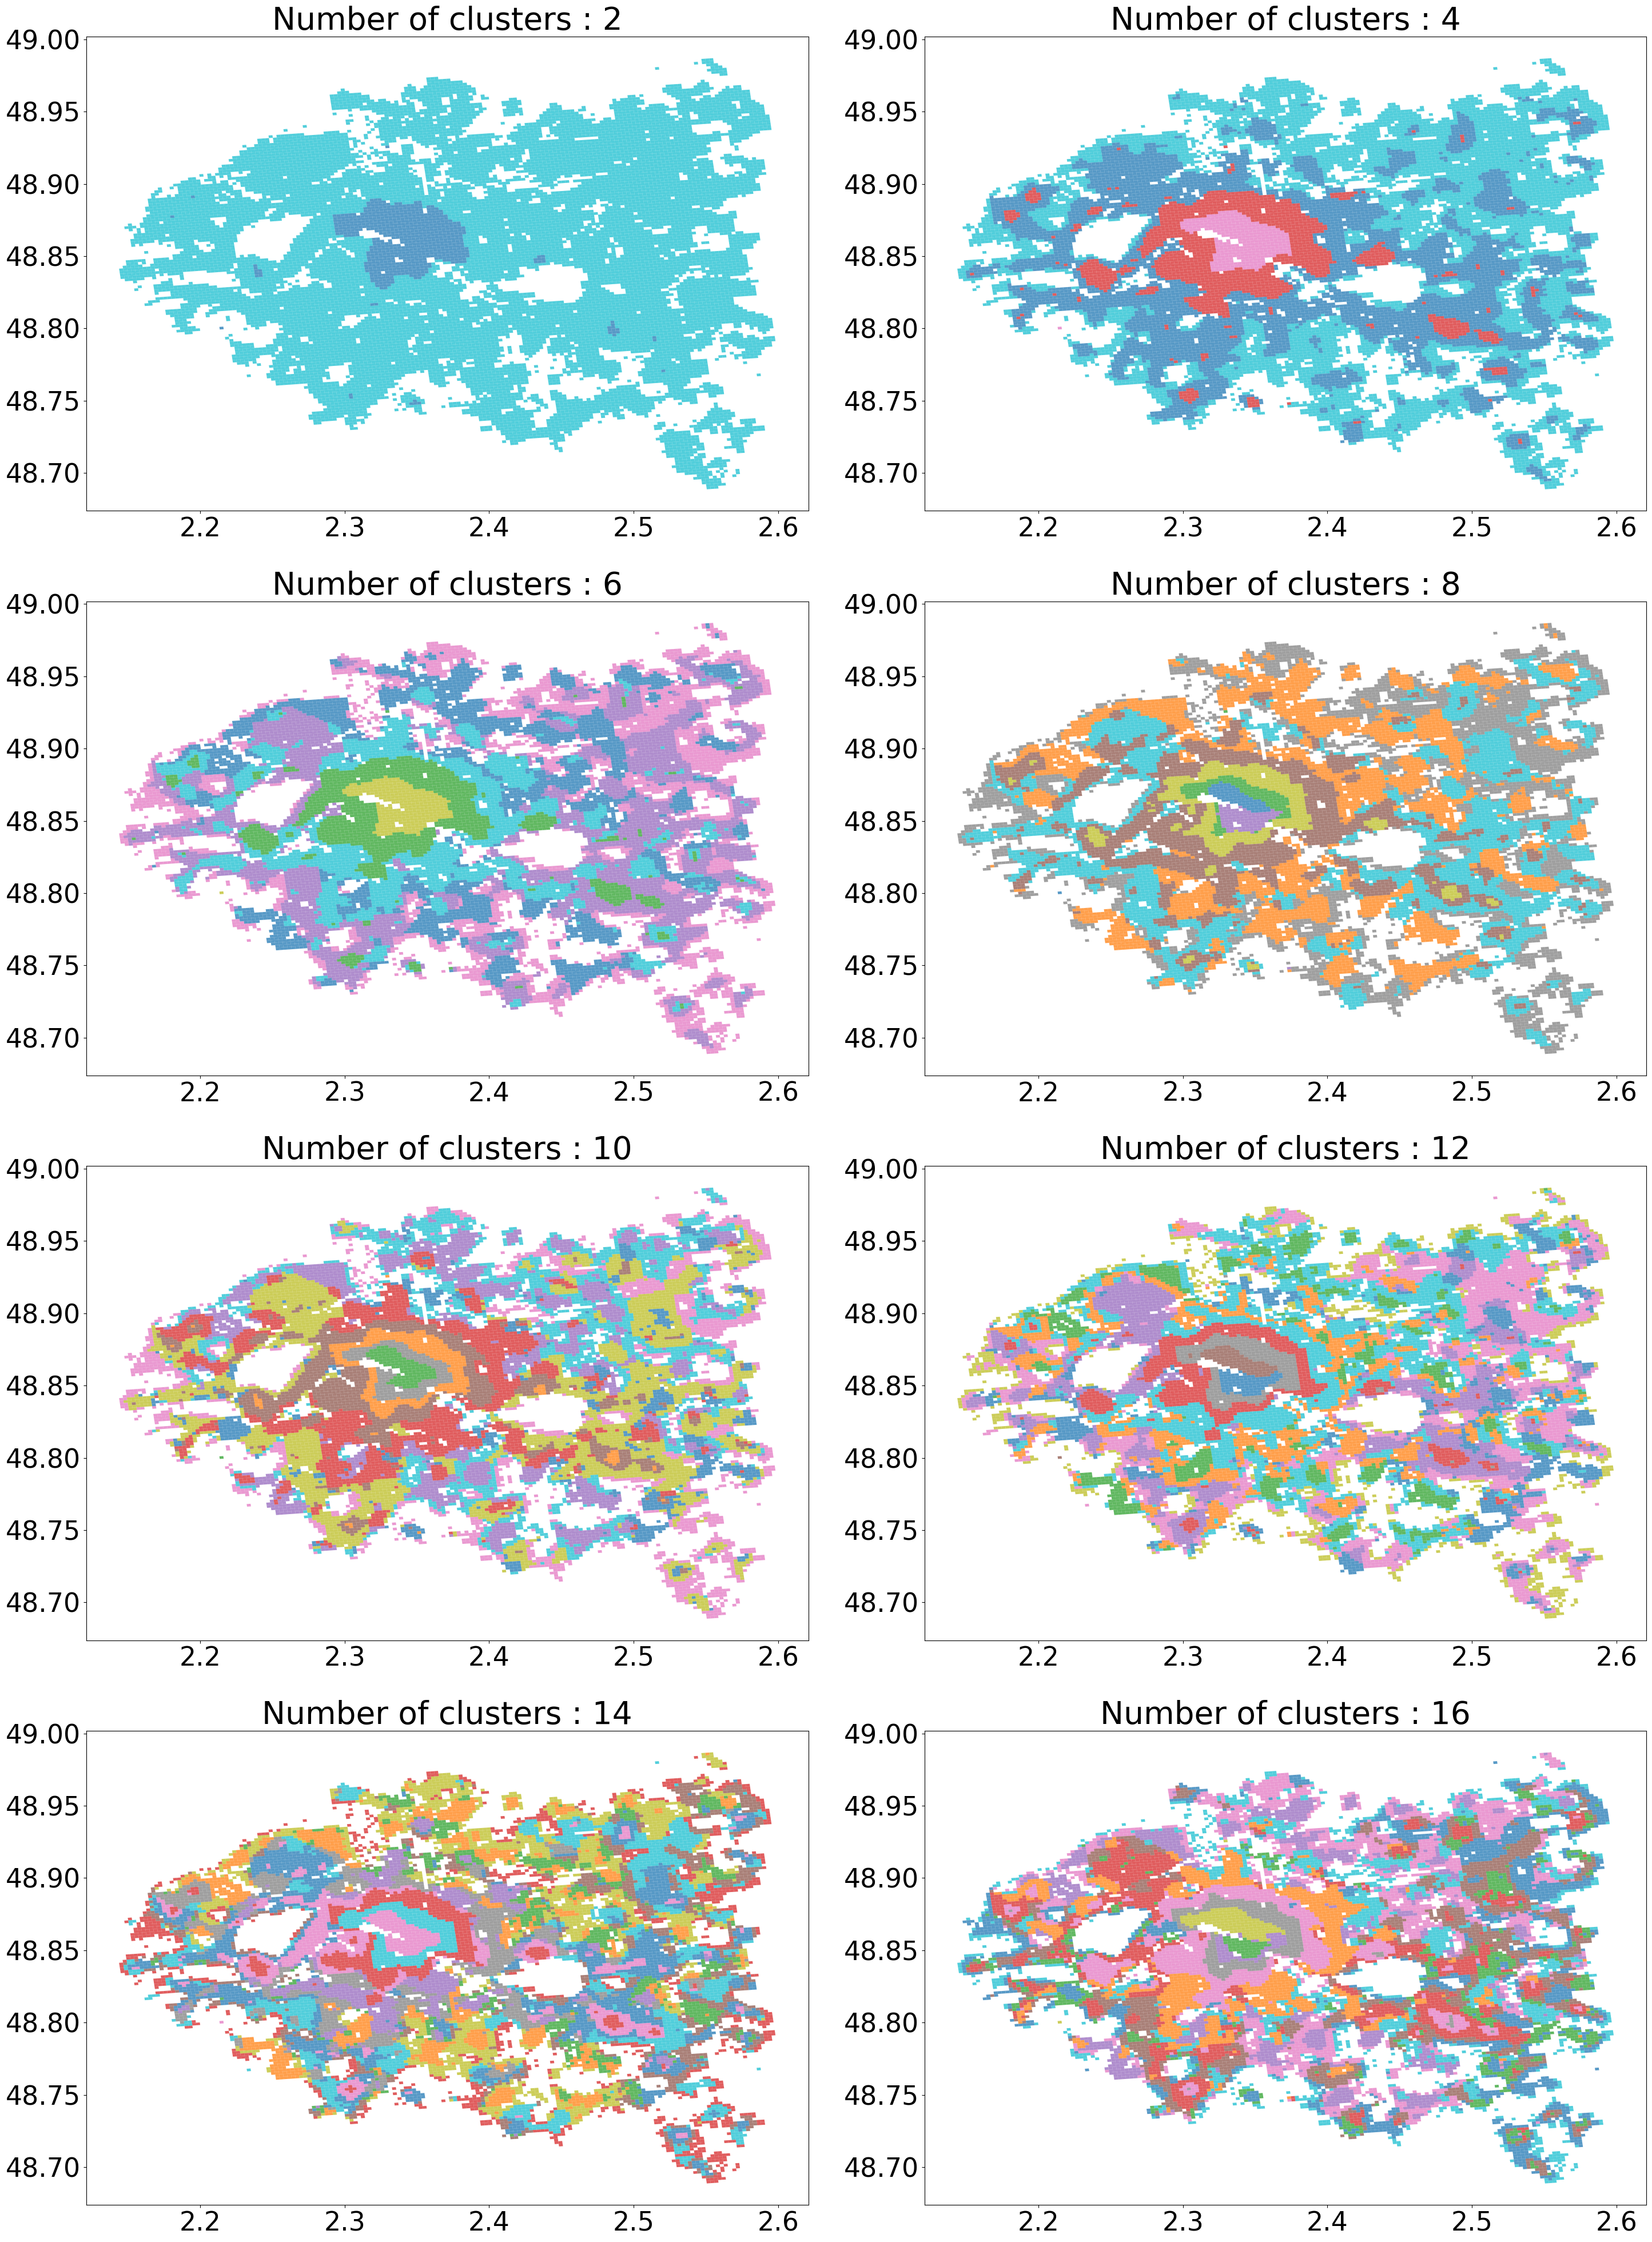

<module 'matplotlib' from 'c:\\Users\\leopo\\anaconda3\\envs\\batomouche\\lib\\site-packages\\matplotlib\\__init__.py'>

In [44]:
n_descante = 8
from pysal.lib import weights

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, MiniBatchKMeans
w_queen = weights.contiguity.Queen.from_dataframe(pc_gdf_exclu_bois)

import numpy as np
import matplotlib as mpl
reload(mpl)
import matplotlib.pyplot as plt
font = {'size'   : 33}

mpl.rc('font', **font)
mat = X.values

pipe = Pipeline(steps=[('preprocessor', StandardScaler),
                      ('clustering', MiniBatchKMeans)])

scaler = pipe['preprocessor']()
scaler.fit(X=mat)
mat = scaler.transform(mat)

fig,axs = plt.subplots(ncols = 2, nrows = n_descante//2, figsize=(30,40))

for i in range(n_descante):
    n_cluster = (i+1)*2
    #clustering = pipe['clustering'](connectivity = w_queen.symmetrize().full()[0], compute_full_tree= True, distance_threshold=0, n_clusters=None)
    clustering = pipe['clustering'](n_clusters = n_cluster
    #        ,connectivity = w_queen.symmetrize().full()[0], #to use with aggloclustering
    )
    clustering.fit(mat)
    pc_gdf_exclu_bois["label"] = clustering.labels_
    ax = axs[(i-(i%2))//2][i%2]
    pc_gdf_exclu_bois.plot('label',ax=ax, cmap='tab10', categorical = True
    , categories = range(n_cluster-1,-1,-1)
    , alpha = 0.75
    )
    ax.set_title(f"Number of clusters : {n_cluster}")
fig.tight_layout()
plt.show()
reload(mpl)

### Visualisation

In [ ]:
hs.folium_grid_cat_plot(pc_gdf_exclu_bois,'label',cmap="gist_rainbow", discrete = False,op=0.01)

### Analysis of the clusters

#### Socio economic var

In [53]:
pc_gdf_exclu_bois['Ind_mineur'] =100* (pc_gdf_exclu_bois['Ind_0_3']+pc_gdf_exclu_bois['Ind_4_5']+pc_gdf_exclu_bois['Ind_6_10']+pc_gdf_exclu_bois['Ind_11_17'])/pc_gdf_exclu_bois['Ind']
pc_gdf_exclu_bois['Ind_jeune']= 100*pc_gdf_exclu_bois['Ind_18_24']/pc_gdf_exclu_bois['Ind']
pc_gdf_exclu_bois['Ind_actif'] = 100*(pc_gdf_exclu_bois['Ind_25_39']+pc_gdf_exclu_bois['Ind_40_54']+pc_gdf_exclu_bois['Ind_55_64'])/pc_gdf_exclu_bois['Ind']
pc_gdf_exclu_bois['Ind_old'] = 100*(pc_gdf_exclu_bois['Ind_65_79']+pc_gdf_exclu_bois['Ind_80p']+pc_gdf_exclu_bois['Ind_55_64'])/pc_gdf_exclu_bois['Ind']
pc_gdf_exclu_bois['Men_pauv_rela'] =100* pc_gdf_exclu_bois['Men_pauv']/pc_gdf_exclu_bois['Men']
pc_gdf_exclu_bois['Men_1ind_rela'] =100* pc_gdf_exclu_bois['Men_1ind']/pc_gdf_exclu_bois['Men']
pc_gdf_exclu_bois['Men_5ind_rela'] = 100*pc_gdf_exclu_bois['Men_5ind']/pc_gdf_exclu_bois['Men']
pc_gdf_exclu_bois['Men_prop_rela'] = 100*pc_gdf_exclu_bois['Men_prop']/pc_gdf_exclu_bois['Men']
pc_gdf_exclu_bois['Men_fmp_rela'] = 100*pc_gdf_exclu_bois['Men_fmp']/pc_gdf_exclu_bois['Men']
pc_gdf_exclu_bois['mean_Ind_snv'] = pc_gdf_exclu_bois['Ind_snv']/pc_gdf_exclu_bois['Ind'] 


In [54]:
varSocioEco = ['Men_pauv_rela', 'Men_1ind_rela',
       'Men_5ind_rela', 'Men_prop_rela', 'Men_fmp_rela','Ind', 'mean_Ind_snv','Ind_mineur', 
       'Ind_jeune', 'Ind_actif', 'Ind_old']

#### dico var

In [55]:
dico_var = {'Ind' : "Nombre d’individus",
'Men' : "Nombre de ménages",
'Men_pauv' : "Nombre de ménages pauvres",
'Men_1ind' : "Nombre de ménages d’un seul individu",
'Men_5ind' : "Nombre de ménages de 5 individus ou plus",
'Men_prop' : "Nombre de ménages propriétaires",
'Men_fmp' : "Nombre de ménages monoparentaux",
'Men_pauv_rela' : "% de ménages pauvres",
'Men_1ind_rela' : "% de ménages d’un seul individu",
'Men_5ind_rela' : "% de ménages de 5 individus ou plus",
'Men_prop_rela' : "% de ménages propriétaires",
'Men_fmp_rela' : "% de ménages monoparentaux",
'Ind_snv' : "Somme des niveaux de vie winsorisés des individus",
'mean_Ind_snv' : "Moyenne des niveaux de vie winsorisés des individus",
'Ind_0_3' : "Nombre d’individus de 0 à 3 ans",
'Ind_4_5' : "Nombre d’individus de 4 à 5 ans",
'Ind_6_10' : "Nombre d’individus de 6 à 10 ans",
'Ind_11_17' : "Nombre d’individus de 11 à 17 ans",
'Ind_18_24' : "Nombre d’individus de 18 à 24 ans",
'Ind_25_39' : "Nombre d’individus de 25 à 39 ans",
'Ind_40_54' : "Nombre d’individus de 40 à 54 ans",
'Ind_55_64' : "Nombre d’individus de 55 à 64 ans",
'Ind_65_79' : "Nombre d’individus de 65 à 79 ans",
'Ind_80p' : "Nombre d’individus de 80 ans ou plus", 
'Ind_mineur' : "% d’individus de 0 à 17 ans",
'Ind_jeune': "% d’individus de 18 à 24 ans",
'Ind_actif' : "% d’individus de 25 à 64 ans",
'Ind_old' :"% d’individus de 65 ans ou plus",
'Log_access': '2SFCA Logements',
'Log_soc_access': '2SFCA Logements sociaux',
'restaurant_access': '2SFCA restaurants',
'culture and art_access': '2SFCA culture and art',
'education_access': '2SFCA education',
'food_shops_access': '2SFCA food shops',
'fashion_beauty_access': '2SFCA fashion beauty',
'supply_shops_access': '2SFCA supply shops'
}

#### Violin plots on accessibility scores

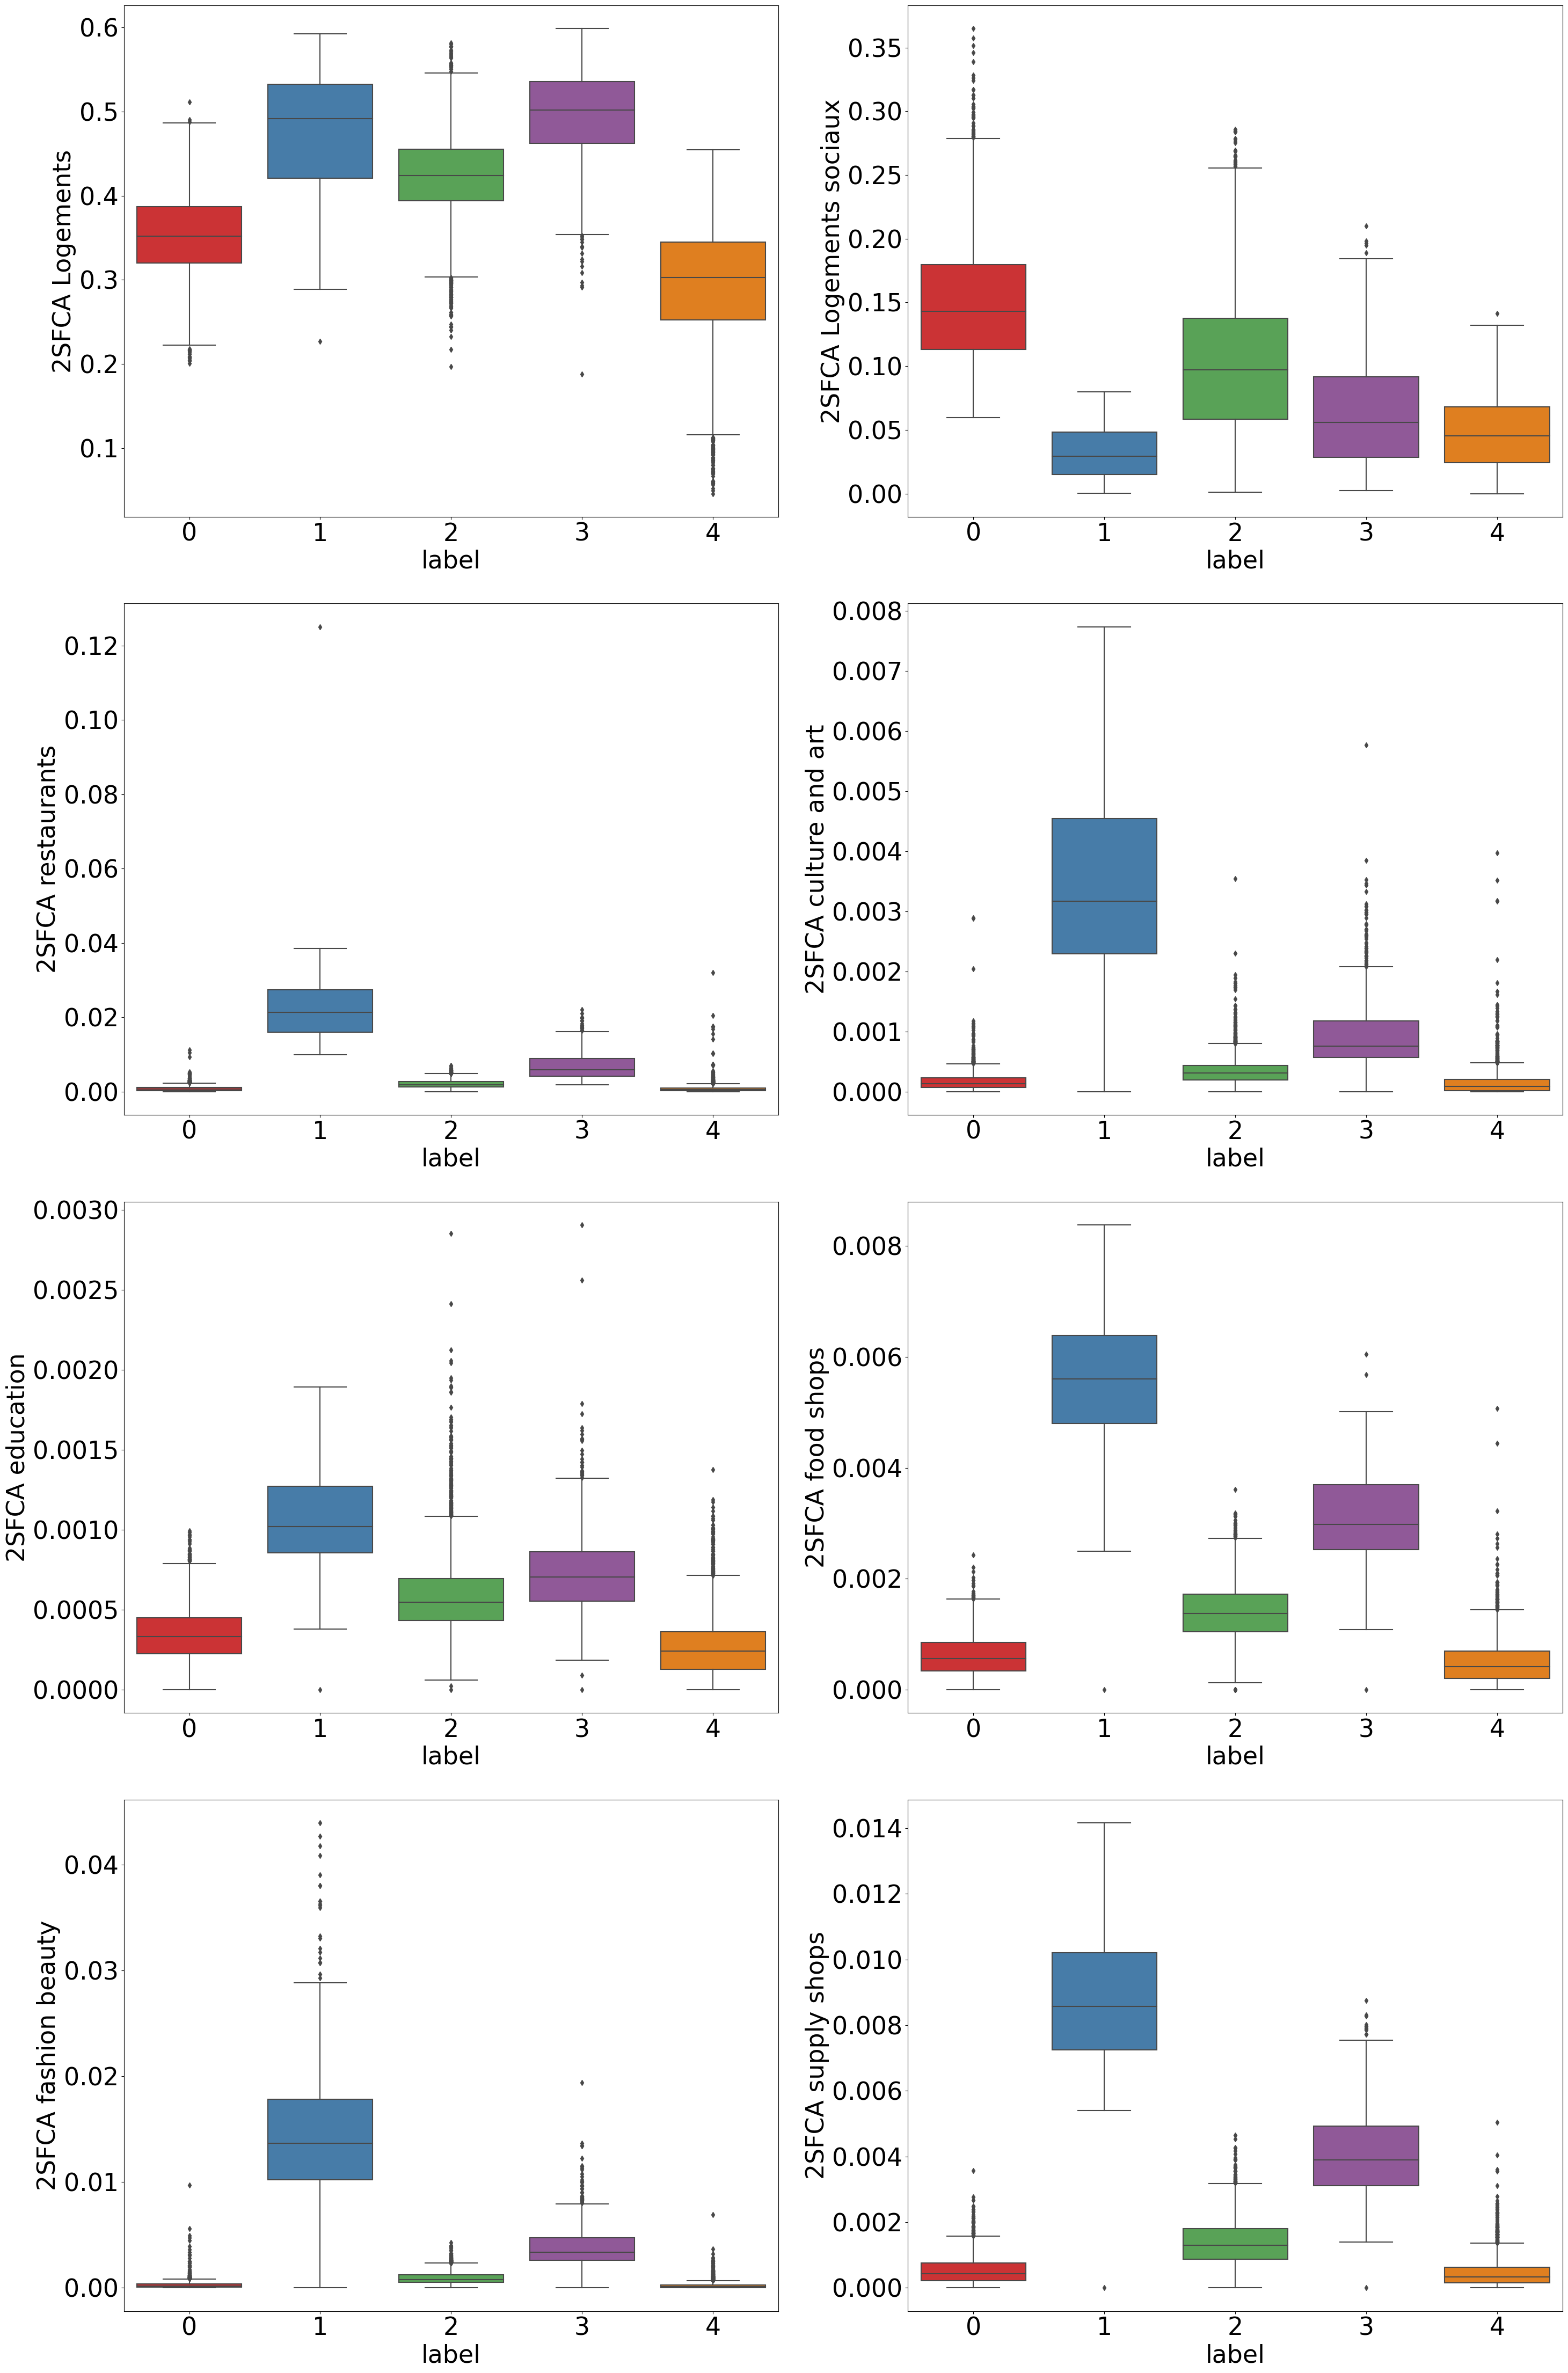

In [56]:
base_bis = pc_gdf_exclu_bois[['label']+varSocioEco+clusterVar]
hs.boxplots(base_bis,clusterVar,nb_cluster,dico_var=dico_var,ttest=False)

#### Clusters data on the socio eco var.
we can also do a box plot cf visualize.py

In [57]:
varSocioEcoShort = ['Men_pauv_rela','mean_Ind_snv', 'Ind_mineur',
 'Ind_jeune',
 'Ind_actif',
 'Ind_old']

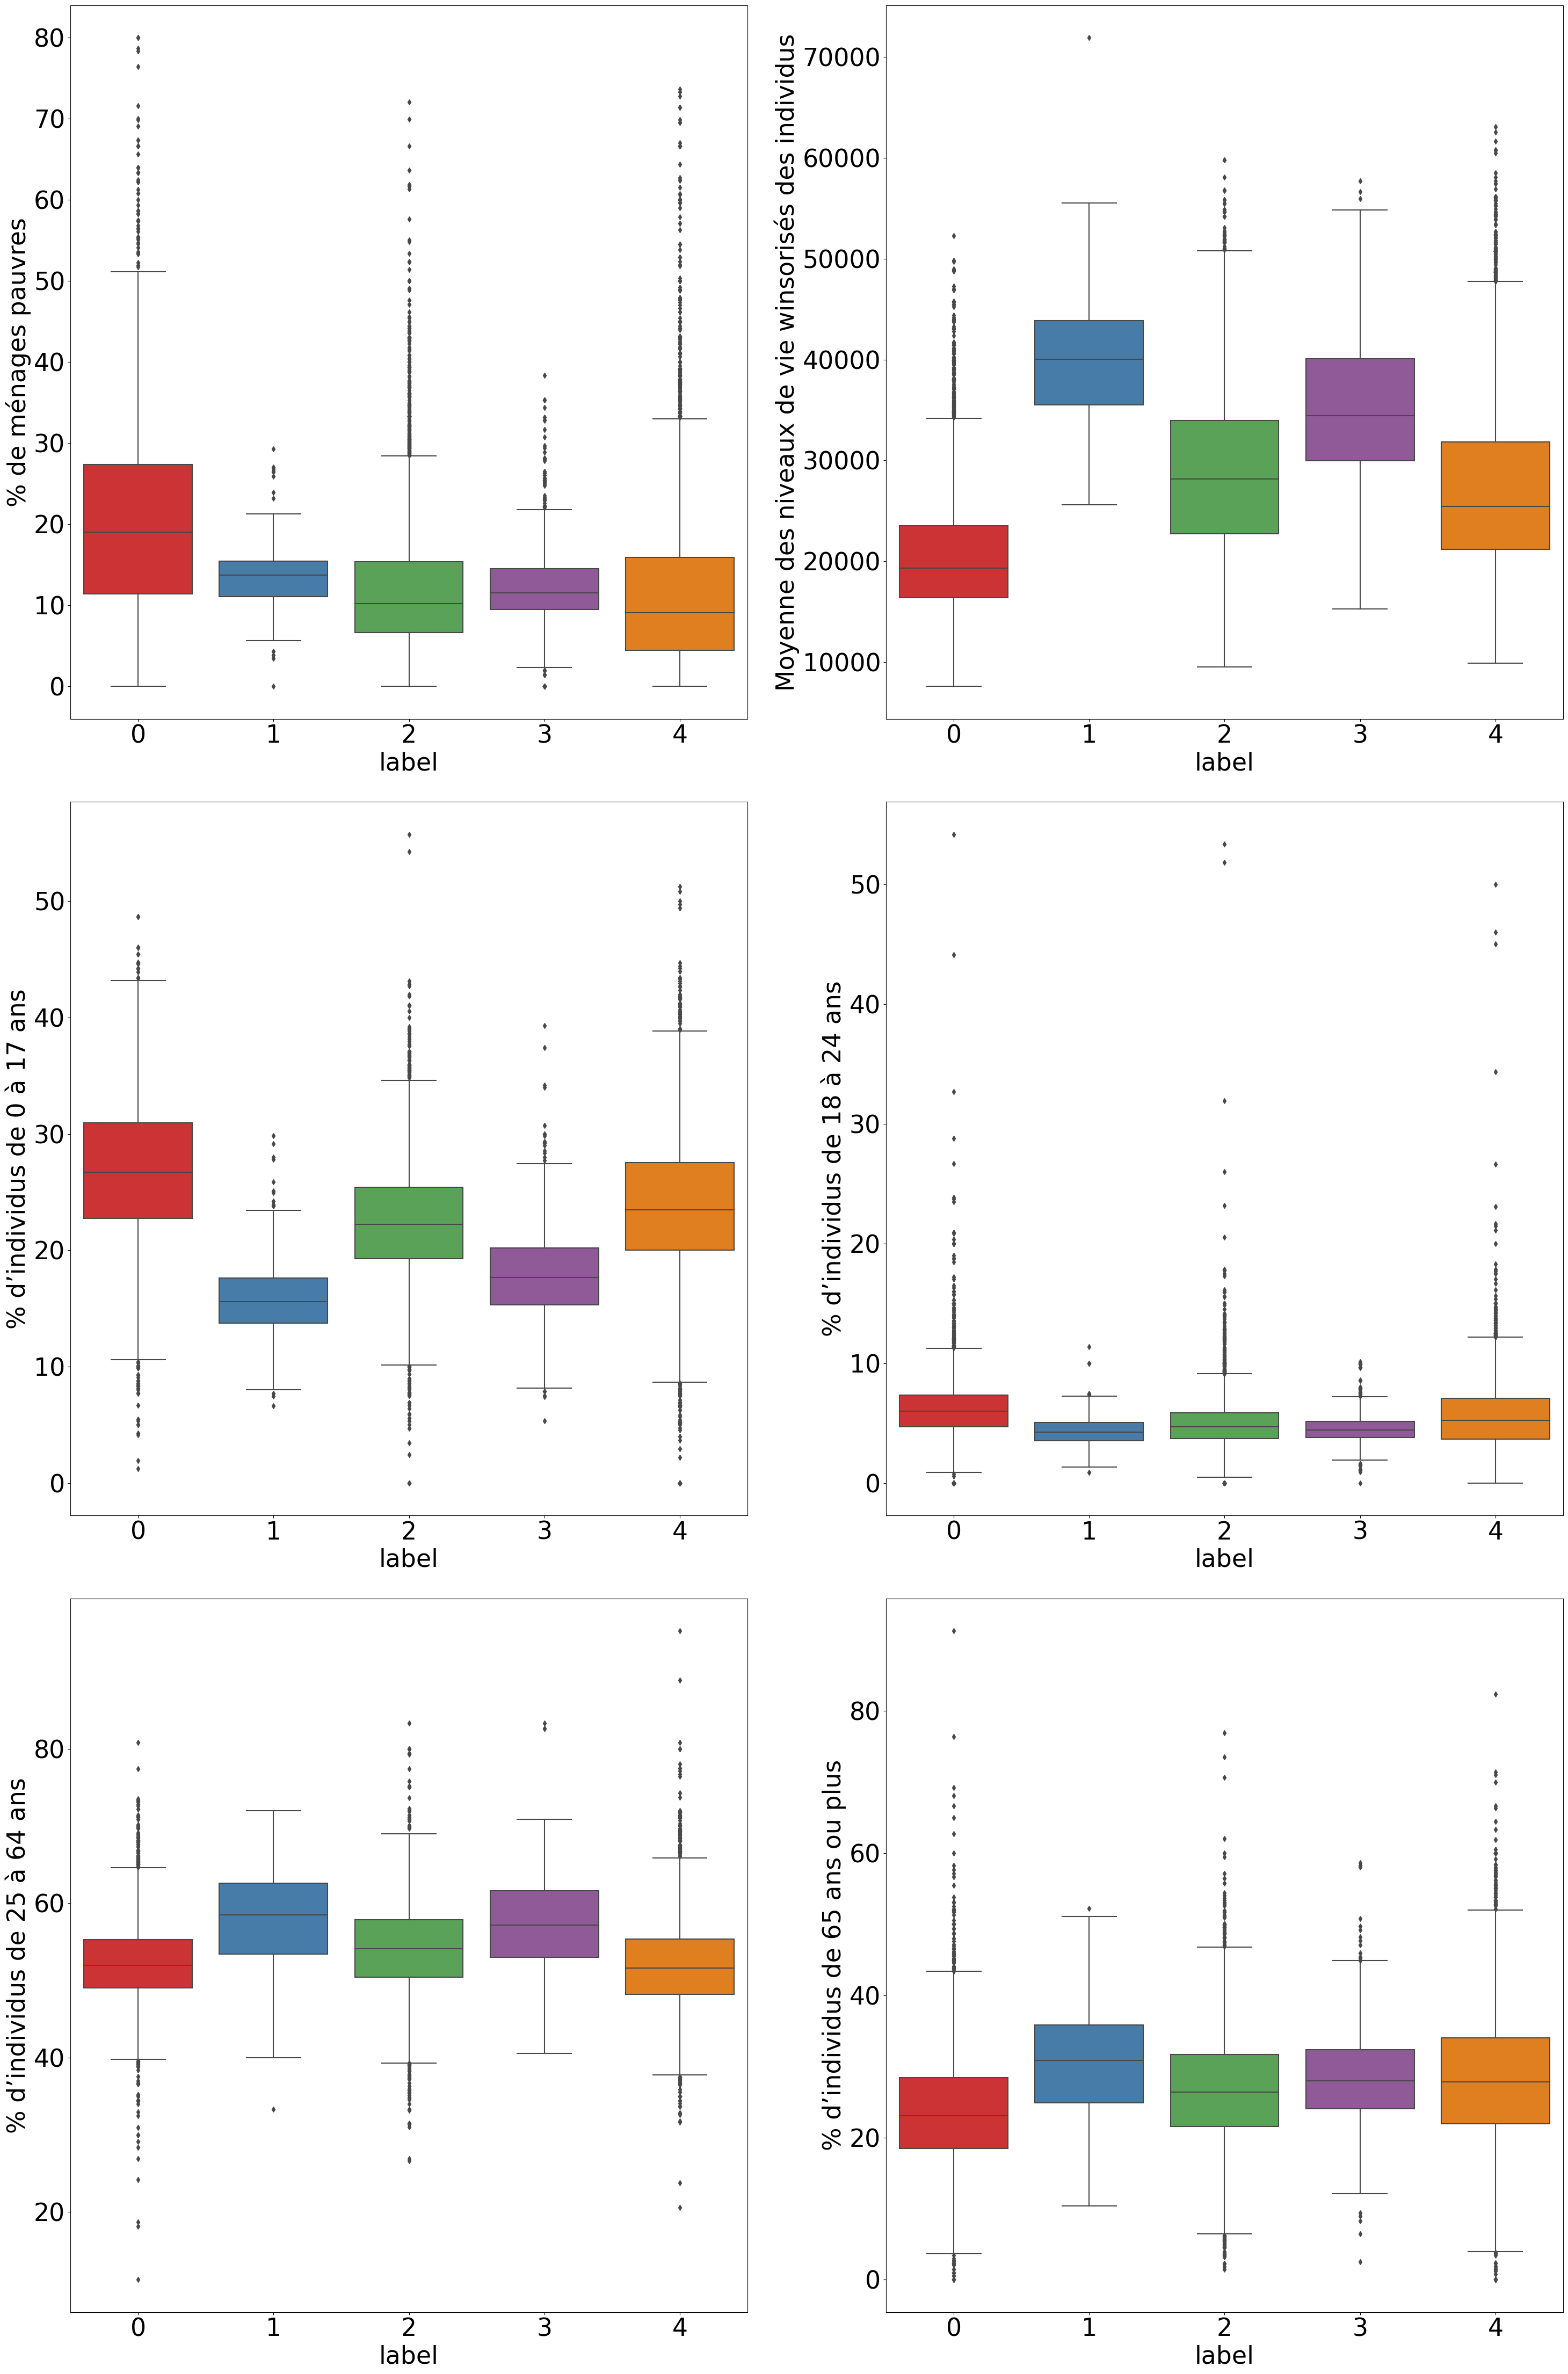

In [58]:
hs.boxplots(base_bis,varSocioEcoShort,nb_cluster,dico_var=dico_var,ttest=False)